## Assessment Task
Students are advised to review and adhere to the submission requirements documented after the assessment task. 

<b>Scenario:</b>

This CA consists of 2 parts. Neural Networks and Semantic analysis.

### Neural Networks

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame. 
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.

### Semantic Analysis

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of  the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.


First we need to import some libraries

import `Pandas` library to structure the data in Dataframe for better understanding.

import `seaborn` and `matplotlib` to plot some visualization.

import `numpy` to handle with numbers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Create a variable to get Bankrecords.csv file in a DataFrame and read the first five rows

In [2]:
df = pd.read_csv('BankRecords.csv')
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


### Display the last five rows from DataFrame.

In [3]:
df.tail()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No
4999,5000,28,4,83,92612,3,0.8,Diploma,0,No,No,No,Yes,Yes


### Dataset infomation
 * `check_dataset` function with paramenter "df" 
 * `format()` to display row and  columns values as strings
 * the `center()` to display the title of information in the centre.
 * the `dfdtype` to display the data types (Object,integer, float..)
 * The `df.duplicated()` to check duplicate values
 * The `df.isna()` check in if there is any missing value or NA().
 * The `(df.describe()` to display statical information from numerical columns.

In [4]:
def check_dataframe(df):
    print("Dataset Bank record".center(83,'~'))
    print(df.info())
    print("SHAPE".center(82,'~'))
    print("Rows:{}".format(df.shape[0]))
    print('Columns{}'.format(df.shape[1]))
    print('Types'.center(82,'~'))
    print(df.dtypes)
    print('Duplicated values'.center(83,'~'))
    print(df.duplicated().sum())
    print("If there is Missing Values".center(83,'~'))
    print(df.isna().sum())
    print('Summary statistics for numerical columns'.center(83,'~'))
    print(df.describe())
    
check_dataframe(df)    
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dataset Bank record~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5

The <b>df.columns,/b> to display columns names.

In [5]:
df.columns

Index(['ID', 'Age', 'Experience(Years)', 'Income(Thousands's)', 'Sort Code',
       'Family', 'Credit Score', 'Education', 'Mortgage(Thousands's)',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',
       'CreditCard'],
      dtype='object')

### Categorical Bar plots
* The `categorical_columns` variable will get  List of categorical columns
* fig,axes variable will get <b>plt.subplots()</b> function to Create subplots with number the rows and columns and plots sizes parameters.
* for loop iterates over each subplot axis <b>(ax)</b> and each column name `(column)` simultaneously using zip. For each column.
* <b>df[column].value_counts()</b> counts the occurrences of each unique value in the column.
* <b>.plot(kind='bar', ax=ax)</b> creates a bar plot of these counts on the specified axis <b>(ax).,/b>
* <b>ax.set_title(f'Distribution of {column}')</b> sets the title of the subplot to indicate which column's distribution is being plotted.
* <b>ax.set_xlabel(column)</b> labels the x-axis with the column name.
* <b>ax.set_ylabel('Count')</b>labels the y-axis with "Count", indicating the frequency of each unique value.
* <b>plt.tight_layout()</b>adjusts the spacing between subplots to prevent overlap.
* <b>plt.show()</b> displays the plots.

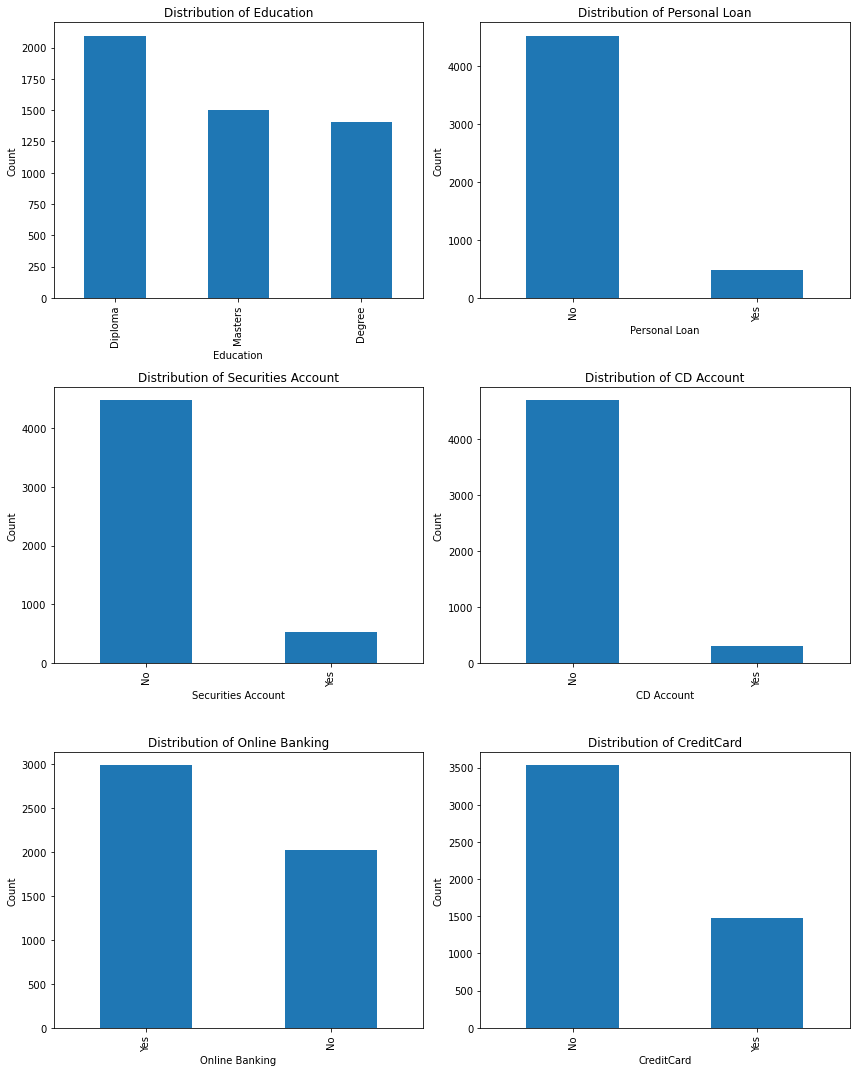

In [6]:
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


### Histograms for numerical variables

* The `df.hist()` function with numerical variables columns to  generates histograms for the specified columns.
* `bins` to set how many intervalos the data range is divided. `figsize` to set up the size of histograms.
* ` plt.suptitle` sets a title for the entire figure
* `plt.show()` set to displays the plots.

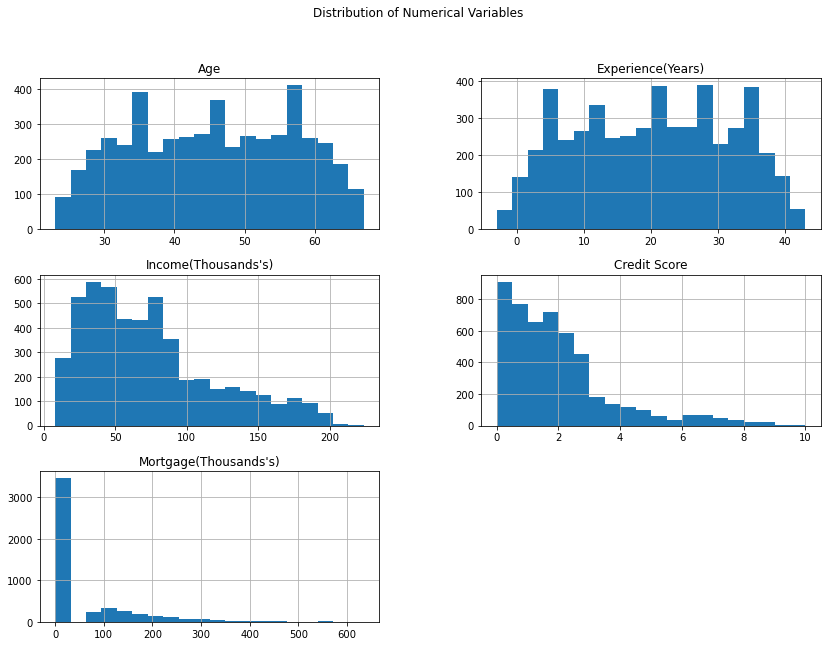

In [7]:
df.hist(column=['Age', 'Experience(Years)', 'Income(Thousands\'s)', 'Credit Score', 'Mortgage(Thousands\'s)'], bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

### Correlation matrix and heatmap

<p>A correlation matrix is a powerful tool to understand the linear relationships between different features in a <code>dataset</code>.According to research(w3schools, n.d.)"A correlation matrix is simply a table showing the correlation coefficients between variables."Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.</p>

* we set the size by <b>figure()</b>
* `Correlation_matrix `varible get numerical variable from the dataset also get <b>corr(),</b>method from pandas.
* <b>heatmap()</b> method for creating 2D clustered heatmaps, with parameters correlation_matrix variable, annot= true to display the plot and cmap to the display the colors
* <b>plt.title</b> to display the plot's title.
* <b>plt.show()</b>to display the plot

As you can see below Correlation Matrix table:

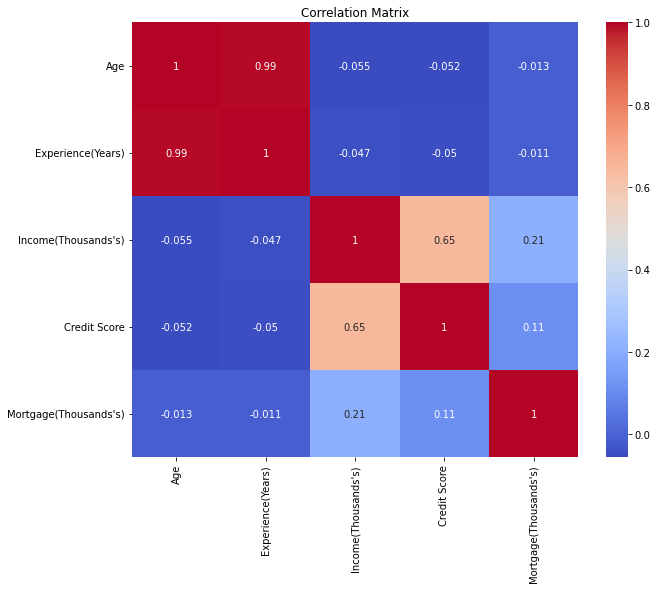

In [8]:
correlation_matrix = df[['Age', 'Experience(Years)', 'Income(Thousands\'s)', 'Credit Score', 'Mortgage(Thousands\'s)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<p>Correlation matrix helps to Identifying Relationships, which means pairs of variables that are strongly correlated. For example, if <b>income(Thousands's)`</b>and <b>credit score</b>(0.65) have a high positive correlation, it means that as income increases, credit score also tends to increase.</p>

Pairplot helps us visualize the relationship of our feature `dataset</b`, It would also help to decide which algorithms we could use to make our prediction such as `RandomForestRegressor` and `Linear Regression`, as you can see since this is a regression problem we have some linear features and clusters as well.

* created a list with dataset columns
* <b>df_sample</b> it'll get a `frac=0.1` <b>10%</b> amount of dataset and random_state to generate always the same random numbers.
* This line creates a pairplot with <b>df_sampled DataFrame</b>, coloring the points by the Income(Thousands's) column.
* markers=".": Specifies the marker type for the scatter plots.
* plot_kws={'alpha':0.2}: Sets the transparency level for the scatter plot points.
* diag_kind='kde': Uses kernel density estimation for the diagonal plots.
* The creation of pairplot was based from this source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

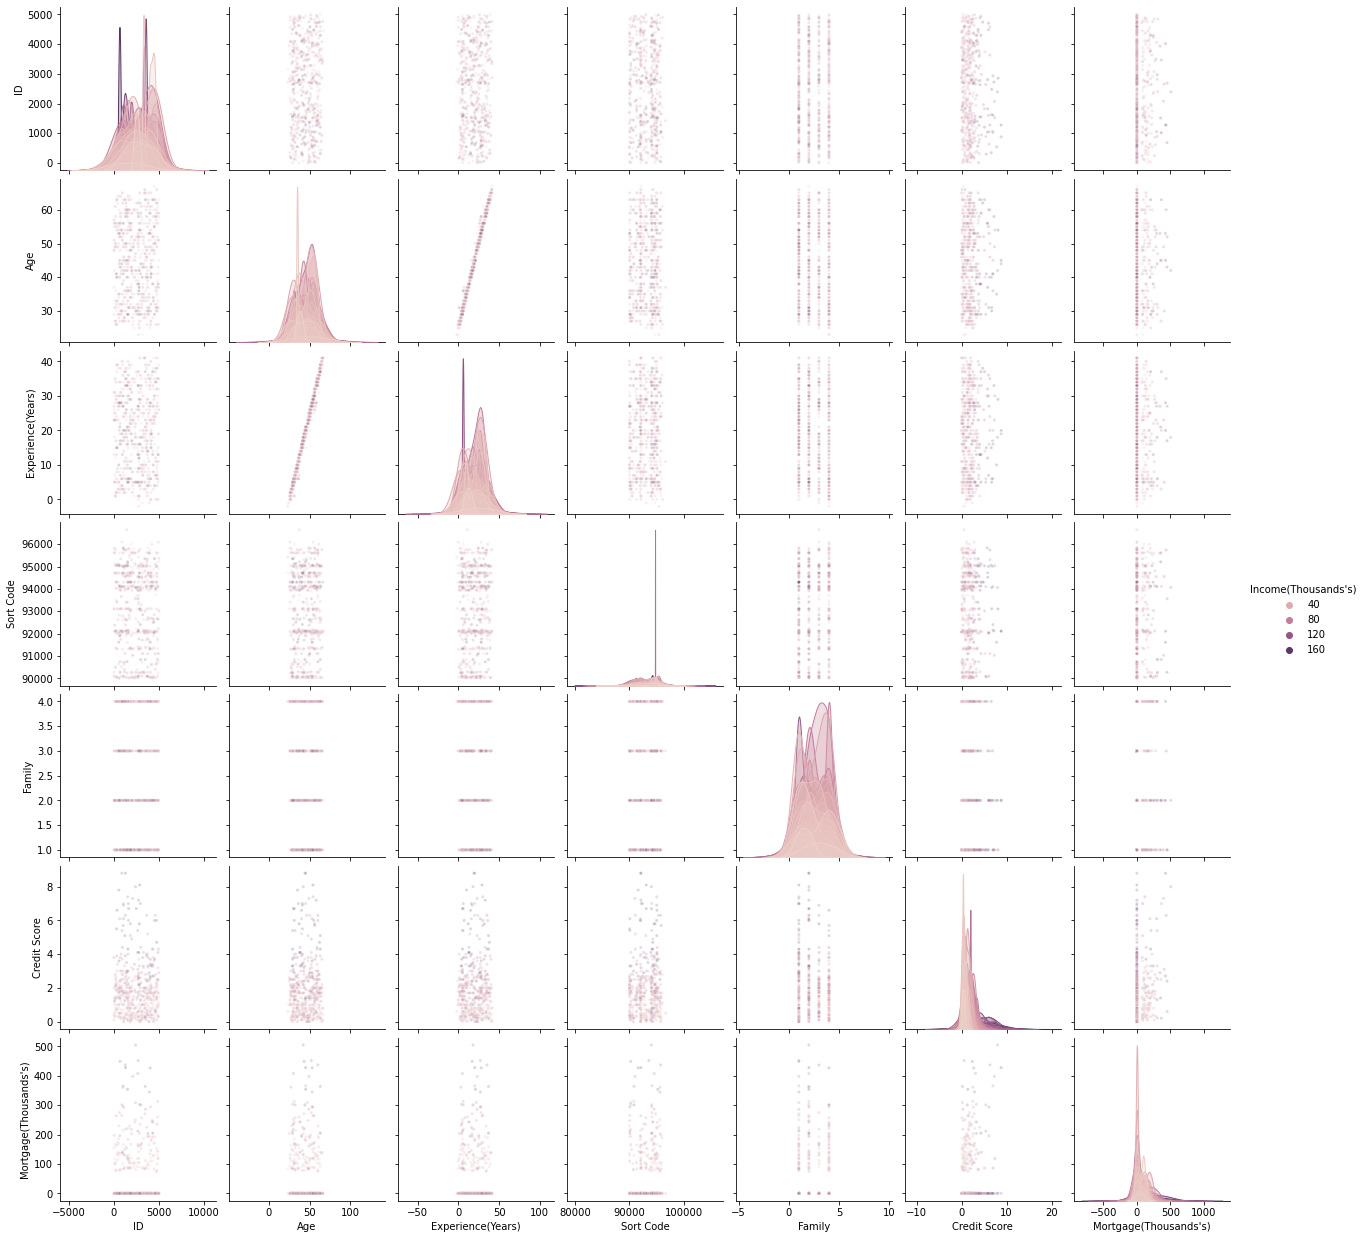

In [9]:
columns_df = ['ID', 'Age', 'Experience(Years)', 'Income(Thousands\'s)', 'Sort Code',
       'Family', 'Credit Score', 'Education', 'Mortgage(Thousands\'s)',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',
       'CreditCard']

df_sampled = df[columns_df].sample(frac=0.1, random_state=1)

pairplot = sns.pairplot(df_sampled, hue="Income(Thousands\'s)", markers=".", plot_kws={'alpha':0.2}, diag_kind='kde')
plt.show()



## Data preparation

As we plan to apply `linear regression` we need first encoded <b>categorical features</b>, for that we're going to use `One-hot encoded`.According to Imran Khan (2024)"This method is particularly useful for linear models and scenarios where the categorical feature is not ordinal."

* categorical_columns variable will get the categorical columns feautes list
* <b>df_encoded will</b> get `pd.get_dummies` to apply one-hot encoded into categorical features
* df_encoded.head() will display the five first rows and show the extras columns.

When you use drop_first=True in one-hot encoding with pd.get_dummies, it drops the first category from each categorical column to avoid the dummy variable trap, which can cause multicollinearity in certain statistical models.According to Soulpage IT Solutions (n.d.) "It is common to drop one of the one-hot encoded columns to avoid multicollinearity (linear dependence) in certain models like linear regression."


For the `Education column`, the category `Degree is dropped`, leaving <b>Diploma</b> and <b>Masters</b> as encoded columns.
Here's how it works:

* If both Education_Diploma and Education_Masters are 0, it means the value is "Degree".
* If Education_Diploma is 1, it means the value is "Diploma".
* If Education_Masters is 1, it means the value is "Masters".

below the following line of code:

In [10]:

categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']


df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()


,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Education_Diploma,Education_Masters,Personal Loan_Yes,Securities Account_Yes,CD Account_Yes,Online Banking_Yes,CreditCard_Yes
0,1,25,1,49,91107,4,1.6,0,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,0,0,1


`df` will get the encoded categorical values

In [11]:
df = df_encoded

Display the information of `dataset` to show all categorical features are types integers.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      5000 non-null   int64  
 1   Age                     5000 non-null   int64  
 2   Experience(Years)       5000 non-null   int64  
 3   Income(Thousands's)     5000 non-null   int64  
 4   Sort Code               5000 non-null   int64  
 5   Family                  5000 non-null   int64  
 6   Credit Score            5000 non-null   float64
 7   Mortgage(Thousands's)   5000 non-null   int64  
 8   Education_Diploma       5000 non-null   uint8  
 9   Education_Masters       5000 non-null   uint8  
 10  Personal Loan_Yes       5000 non-null   uint8  
 11  Securities Account_Yes  5000 non-null   uint8  
 12  CD Account_Yes          5000 non-null   uint8  
 13  Online Banking_Yes      5000 non-null   uint8  
 14  CreditCard_Yes          5000 non-null   

<p>Since we do not have an ordinal order in our categorical feature, `one-hot encoding` was the best choice, this can also increase the calculation time to the <b>RandomForestRegression</b> time as the dimensionality of the dataset increases when adding more columns</p>

### Feature scalling
<p>As you can see, all the features in our dataset have different ranges, which causes problems when we run some algorithm, like linear regression on our support vector machine, for example.According to Simplilearn (2023) "When you are entirely aware of the feature distribution of your data, or, to put it another way, when your data has a Gaussian distribution, standardization in the machine learning model is useful."We can see that there is a right-skewed distribution in some features (mortgage, credit score, and income), so standardization would be a good choice to scale all of our features.</p>

* The `df.hist()` function with numerical variables columns to  generates histograms for the specified columns.
* `bins` to set how many intervalos the data range is divided. `figsize` to set up the size of histograms.
* ` plt.suptitle sets a title for the entire figure`
* `plt.show()` set to displays the plots.


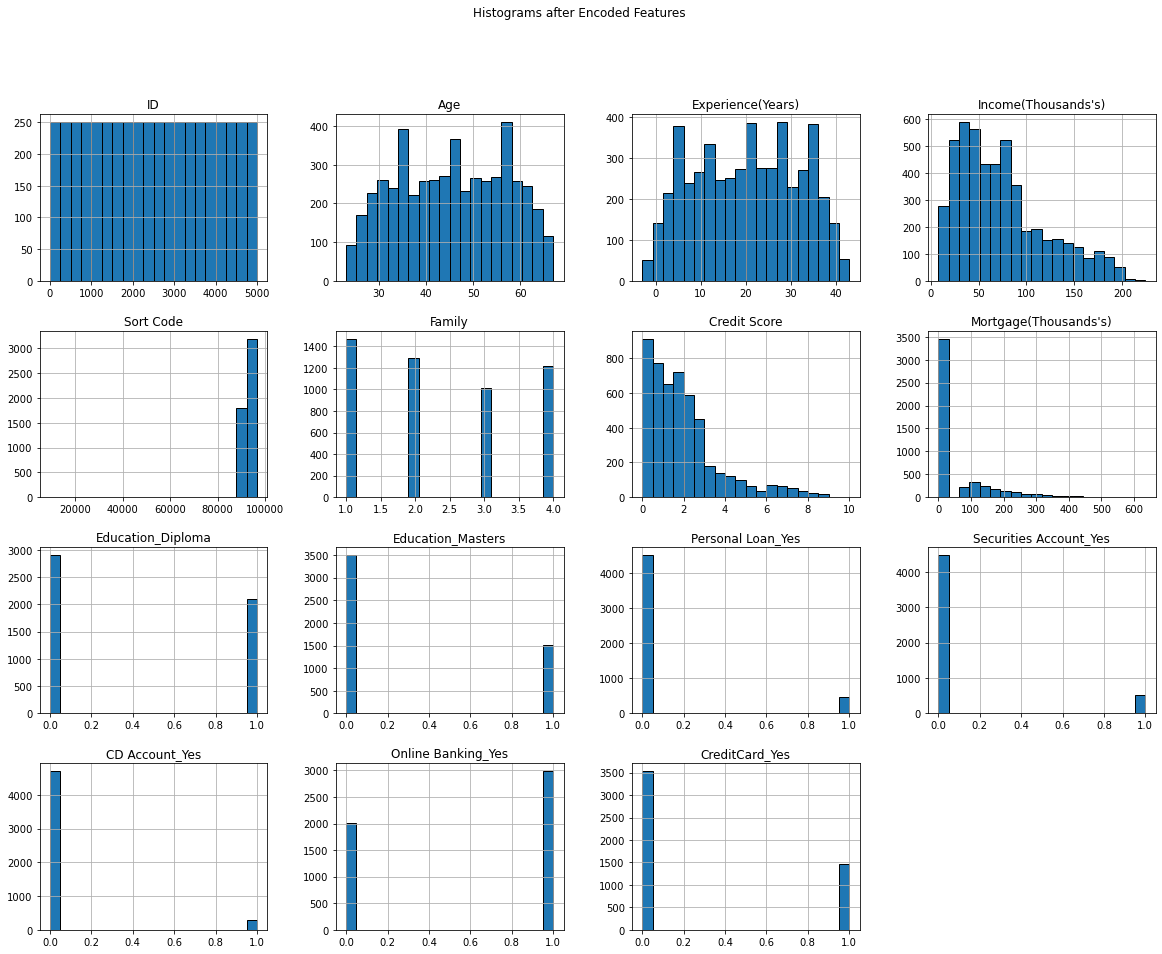

In [13]:
df.hist(figsize=(20, 15), bins=20, edgecolor='black')
plt.suptitle('Histograms after Encoded Features')
plt.show()

Splitting data into training and testing sets before scaling is a standard practice in machine learning to prevent data leakage

* To start, we will first define the <b>'X'</b> where we will get the df dataset and discard only the `'Income(Thousands\'s )`feature.

* <b>'y'</b> will only have the df dataset feature 'Income(Thousands\'s).

As you can see below in the line codes:

In [14]:
X = df.drop(columns=['Income(Thousands\'s)'])
y = df['Income(Thousands\'s)']

To split the data into training and testing sets, we will import the train_test_split function from scikit-learn.

* Where the X_train and y_train will 80% data and X_test and y_test will get 20% of data.

* train_test_split() with parameters where 'X' contains the feature variables and 'y'contains the target variable.

* test_size=0.2 parameter make sure that 20% of the data will be reserved for testing, while the remaining 80% will be used for training.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

So, Now we can calculate standardization with StandardScaler class from sklearn

* import StandardScaler from sklearn
* Create a "scaler variable" we will get StandardScaler() methods
* X_train wiil get the data properly tranformed by fit_transform()
* X_test will get the data properly transformed by transform()
* The fit_transform and transform methods ensure that both sets are scaled consistently, preventing any leakage of data from the testing set to the training set.

The X_train_data variable will be set to get X_train after scaling and display the first 5 rows of the dataset by head().
As you can see in the following line of code

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_data=pd.DataFrame(X_train)
X_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.197795,-1.158067,-1.136388,-1.305467,-1.206542,1.068344,-0.552351,1.176346,-0.653874,-0.321634,2.892695,-0.252646,-1.222833,-0.646092
1,1.510604,-0.546673,-0.612697,-0.548170,0.539855,0.096533,-0.552351,1.176346,-0.653874,-0.321634,2.892695,-0.252646,0.817773,-0.646092
2,-1.189728,-1.245409,-1.136388,-0.960089,-1.206542,2.325981,-0.552351,1.176346,-0.653874,-0.321634,-0.345698,-0.252646,0.817773,-0.646092
3,0.810440,0.414088,0.434686,-0.024897,-1.206542,-0.875277,-0.552351,-0.850090,1.529346,-0.321634,-0.345698,-0.252646,0.817773,-0.646092
4,1.174108,1.462191,1.482068,0.836059,0.539855,-0.989608,-0.552351,1.176346,-0.653874,-0.321634,-0.345698,-0.252646,0.817773,-0.646092


* The X_train_data.hist will generate the plots sizes and color
* ` plt.suptitle sets a title for the entire figure`
* `plt.show()` set to displays the plots.

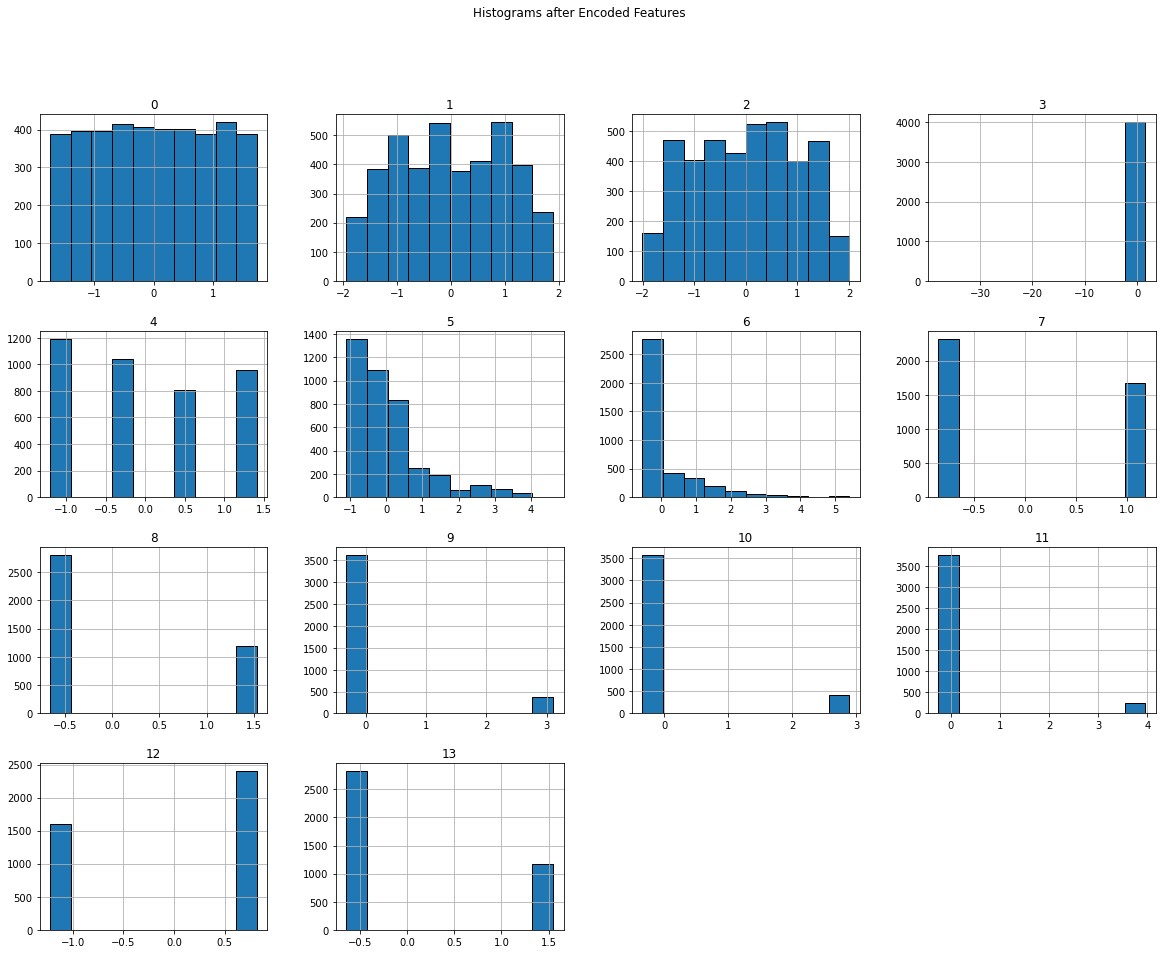

In [17]:
X_train_data.hist(figsize=(20, 15),  edgecolor='black')
plt.suptitle('Histograms after Encoded Features')
plt.show()

After standardization all our Numerical features were scaled to have a mean of 0 and a standard deviation of 1.

###  Modelling

<p>As we are going to predict `Income (Thousands)`, this is an example of a regression problem due to the continuous and quantitative nature of income. The task involves predicting a continuous variable based on multiple input features, which aligns perfectly with the principles of regression analysis.</p>

* First we need to import modulos for that from <b>Sickit learn</b> such as `LinearRegression` and `RandomForestRegression.`
* Also we mean_squared_error and r2_score to how good our regression model's performance.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

* dictionary was create to define the models
* evaluete_model() with  models,<b> X_train, X_test, y_train, y_test</b> as parameters
* np.random.seed(42) to generate as the same number for metrics results
* for loop to get key and value from models dictionary by items methods.
* model.fit to train the training datasets
* y_pred make prediction on unseen data
* Calculate performance metrics:
   * <b>MSE:</b> mean_squared_error(y_test, y_pred)
   * <b>RMSE:</b> np.sqrt(mse) 
   * <b>R-squared:</b> r2_score(y_test, y_pred)
* results to store metrics results into dictionary 
The following lines of codes was taken from :

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}

def evaluate_model(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    return results


results = evaluate_model(models, X_train, X_test, y_train, y_test)
results_data = pd.DataFrame(results)


Display metrics into Dataframe

In [20]:
results_data

,Linear Regression,RandomForestRegressor
MSE,925.697615,435.859054
RMSE,30.425279,20.877238
R2,0.563457,0.794457


* <b>MSE</b> and <b>RMSE</b>: Indicate the mean squared and absolute errors, respectively. Lower values ​​mean better model performance.
* <b>R²:</b> Represents the proportion of variance explained by the model. Higher values ​​indicate a better fit.

## <b>Evaluate and Hypertuning:</b>
        
As we can see `RandomForestRegressor` has the best metrics results, let's hypertuning it:
* First we need to import <b>RandomizedSearCv</b> is a scikit-learn class used for hyperparameter optimization. 

In [21]:
from sklearn.model_selection import RandomizedSearchCV

%%time this display how much times take for interation execution


UserWarning is a general warning class, and FitFailedWarning is specific to failures during model fitting in scikit-learn.

<b>Defining the Hyperparameter Grid</b>
* rf_grid is a dictionary specifying the hyperparameters for the RandomForestRegressor that will be tuned.
* n_estimators: Number of trees in the forest.
* max_depth: Maximum depth of the tree (None means nodes are expanded until all leaves are pure).
* min_samples_split: Minimum number of samples required to split an internal node.
* min_samples_leaf: Minimum number of samples required to be at a leaf node.
* max_features: Number of features to consider when looking for the best split.
* max_samples: Fraction of samples to draw from X to train each base estimator.

rs_model variable will get:
  * RandomForestRegressor() is the model being optimized. with paramenter random state to generate always the same random numbers.
  * param_distributions is set to rf_grid, specifying the hyperparameters and their possible values.
  * n_iter=200 specifies the number of different hyperparameter combinations to try.
  * cv=5 specifies 5-fold cross-validation.
  * verbose=True enables verbose output to monitor the search process.
  
The following lines of code was based from: 

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-bluebook-bulldozer-price-regression.ipynb 

In [22]:
%%time
import warnings
from sklearn.exceptions import FitFailedWarning


warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)



rf_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [0.5, 0.75, 1.0, "sqrt"],
    "max_samples": [0.5, 0.75, 1.0]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                              param_distributions=rf_grid,
                              n_iter=200,
                              cv=5,
                              verbose=True)


rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Wall time: 11min 53s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': [0.5, 0.75, 1.0,
                                                         'sqrt'],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=True)

Print the best parameters after the interation.

In [23]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 1.0,
 'max_depth': 20}

* ideal_model variable will get the best parameter by RandomForestRegressor() function updated with the best parameters
* ideal_model.fit() will train the training datasets

In [24]:
ideal_model = RandomForestRegressor(n_estimators= 100,
                                    min_samples_split= 2,
                                    min_samples_leaf=1,
                                    max_samples = 1.0,
                                    max_features= 0.75,
                                    max_depth= None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.75, max_samples=1.0)

* y_pred_best: This variable stores the predicted values for X_test using the best RandomForestRegressor model.
* mse_best variable to calculate the  mean_squared_error from `(y_test, y_pred_best`
* rmse_bes variable to calculate the root square from  mean_squared_error
* r2_best varible to calculate the  the proportion of the variance in the dependent variable that is predictable from the independent variables.

`best_rf_results` create a dictionary to metrics calculates.
* best_rf_df stores values from dictionary and set 'Tuned RandomForestRegressor' into dataframe
* display the dataframe `best_rf_df`


In [25]:
y_pred_best = ideal_model.predict(X_test)


mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

best_rf_results = {
    'MSE': mse_best,
    'RMSE': rmse_best,
    'R2': r2_best
}

print("Best RandomForestRegressor Results:")
best_rf_df= pd.DataFrame([best_rf_results], index=['Tuned RandomForestRegressor'])
best_rf_df

Best RandomForestRegressor Results:


,MSE,RMSE,R2
Tuned RandomForestRegressor,442.763076,21.041936,0.791201


We had an improvement in RandomForestRegressor() modelling, but to obtain better results we would increase the number of interactions. However, it takes time and depends on the context and requirements, perhaps not the best approach.

## Plotting predict

y_train_RFR will get prediction from X_train dataset

y_test_RFR  will get prediction from X_test  dataset

* plt.subplot(1, 2, 2): This line creates a subplot in the second position of a 1x2 grid.

<b>Training dataset and training test dataset plotting works in the same ways.</b>
* plt.scatter(y_test, y_test_RFR, label='Test Data', color='red'): This line creates a scatter plot of the actual vs. predicted values for the test data.
* plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2): This line plots a diagonal reference line (black dashed line) for the test data,  it's works in the same way  training data subplot.
* plt.xlabel('Actual'): This line sets the x-axis label to 'Actual'.
* plt.ylabel('Predicted'): This line sets the y-axis label to 'Predicted'.
* plt.title('Test Data'): This line sets the title of the subplot to 'Test Data'.
* plt.legend(): This line adds a legend to the plot to label the red scatter points as 'Test Data'.



The following plotting was based from this : https://medium.com/@nandiniverma78988/neural-network-regression-implementation-and-visualization-in-python-d5893713ed79

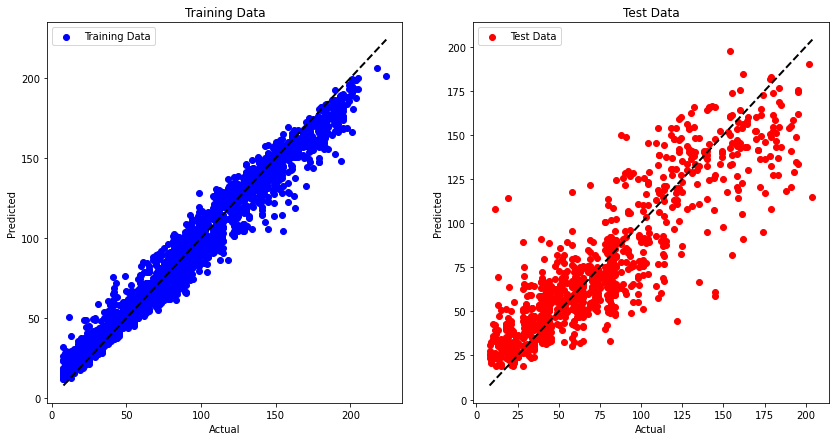

In [26]:
y_train_RFR = ideal_model.predict(X_train)
y_test_RFR = ideal_model.predict(X_test)


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_RFR, label='Training Data', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_RFR, label='Test Data', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.legend()
plt.show()

### Observation

* In the training data plot (left), we observe that the points are densely clustered along the reference diagonal line, indicating that the model predictions are closely aligned with the actual values.

* In the test data plot (right), the points also cluster around the diagonal line, but with a slightly wider spread compared to the training data.

Overall, the model demonstrates good generalization capabilities, as indicated by the alignment of predictions with actual values ​​in both data sets.However, the presence of some outliers suggests that the model may struggle with certain instances in the test set, maybe due to overfitting the training data.

### Neural Network Algorithm  Modelling

First we're going to import necessary libraries.

All this following lines of code below was provided by The Lecturer:<b>David McQuaid</b>

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Set random seeds for reproducibility

In [28]:
np.random.seed(42)
tf.random.set_seed(42)

* model variable will get sequential() model is appropriate for a simple stack of layers where each layer has exactly one input tensor and one output tensor.

* Dense(100, input_dim=20, activation="relu"): Adds a densely-connected layer with 100 units (neurons). input_dim=20 specifies that the input to this layer has 20 features. 

* Dense(10, activation='relu'), Dense(1, activation='relu')Adds another densely-connected layer with 10 units and 1 unit and ReLU activation.

Display the rows and columns from training dataset

In [29]:
X_train.shape

(4000, 14)

In [30]:
model=Sequential()
model.add(Dense(100,input_dim=14, activation="relu"))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

* loss='mean_squared_error': Sets the loss function to mean squared error (MSE), which is commonly used for regression problems.
* optimizer='adam': Specifies the optimizer to use for training the model. Adam is an adaptive learning rate optimization algorithm.
* metrics=['mean_squared_error']: Specifies that the mean squared error should also be tracked during training.

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

* X_train, y_train: The training data and labels.
* epochs=150: The number of times the entire training dataset is passed through the model.
* batch_size=10: The number of samples per gradient update.

In [32]:
%%time
model.fit(X_train,  y_train, epochs=150, batch_size=10) 

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5112.8813 - mean_squared_error: 5112.8813
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 959.8594 - mean_squared_error: 959.8594
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 912.3554 - mean_squared_error: 912.3554
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 881.1011 - mean_squared_error: 881.1011
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 859.0446 - mean_squared_error: 859.0446
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 843.6349 - mean_squared_error: 843.6349
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 831.4840 - mean_squared_error: 831.4840
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 821.8455 - mean_squared_error: 821.8455
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 813.6445 - mean_squared_error: 813.6445
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 806.5780 - mean_squared_err

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 599.2056 - mean_squared_error: 599.2056
Epoch 122/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 597.8836 - mean_squared_error: 597.8836
Epoch 123/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 596.3336 - mean_squared_error: 596.3336
Epoch 124/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 595.7735 - mean_squared_error: 595.7735
Epoch 125/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 595.0037 - mean_squared_error: 595.0037
Epoch 126/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 593.1826 - mean_squared_error: 593.1826
Epoch 127/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 592.6426 - mean_squared_error: 592.6426
Epoch 128/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 591.2274 - mean_squared_error: 591.2274
Epoch 129/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 590.6464 - mean_squared_error: 590.6464
Epoch 130/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 589.1261 - mean_squared_

### Evaluate the model on the test dataset and train dataset

* model.evaluate(X_test, y_test): Evaluates the model on the test data and returns the loss and mean squared error.
* print(f'Test Mean Squared Error: {mse:.4f}'): Prints the mean squared error on the test data to 4 decimal places.

In [33]:
loss, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {mse:.2f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 822.3287 - mean_squared_error: 822.3287  
Test Mean Squared Error: 784.67


In [34]:
loss, mse = model.evaluate(X_train, y_train)
print(f'Train Mean Squared Error: {mse:.2f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 556.1316 - mean_squared_error: 556.1316
Train Mean Squared Error: 544.29


## Hyperparameter tuninig

As we can see there is indication of overfitting 

## Plotting predict

y_train_pred will get prediction from X_train dataset

y_test_pred  will get prediction from X_test  dataset

* plt.subplot(1, 2, 2): This line creates a subplot in the second position of a 1x2 grid.

<b>Training dataset and training test dataset plotting works in the same ways.</b>
* plt.scatter(y_test, y_test_pred, label='Test Data', color='red'): This line creates a scatter plot of the actual vs. predicted values for the test data.
* plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2): This line plots a diagonal reference line (black dashed line) for the test data,  it's works in the same way  training data subplot.
* plt.xlabel('Actual'): This line sets the x-axis label to 'Actual'.
* plt.ylabel('Predicted'): This line sets the y-axis label to 'Predicted'.
* plt.title('Test Data'): This line sets the title of the subplot to 'Test Data'.
* plt.legend(): This line adds a legend to the plot to label the red scatter points as 'Test Data'.



The following plotting was based from this : https://medium.com/@nandiniverma78988/neural-network-regression-implementation-and-visualization-in-python-d5893713ed79

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


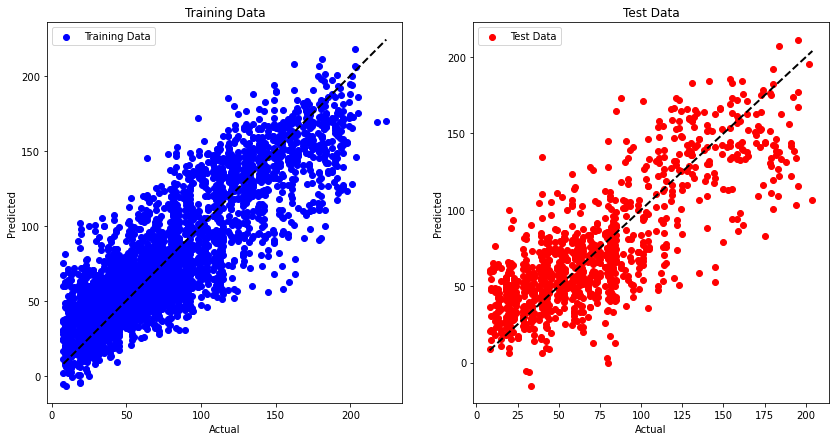

In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.legend()
plt.show()

### Observation:

* In the left plot, which displays the training data, the points are clustered along the diagonal reference line, indicating that the model's predictions are generally accurate relative to the actual values.The high density of points around the diagonal suggests that the model learned the training data well.

* In the right plot, which displays the test data, the points are also clustered along the diagonal line, although the spread appears a little wider compared to the training data.This scatter suggests that the model may fit the training data slightly, but overall, it generalizes reasonably well to the testing data, as most predictions are still close to the actual values.

## Sentiment Analysis

Dataset was taken from: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews 

### Create a variable to get amazon_alexa.tsv file in a DataFrame and read the first five row

In [36]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Dataset infomation
 * `check_dataset` function with paramenter "df" 
 * `format()` to display row and  columns values as strings
 * the `center()` to display the title of information in the centre.
 * the `dfdtype` to display the data types (Object,integer, float..)
 * The `df.duplicated()` to check duplicate values
 * The `isna()` check in if there is any missing value or NA().

In [37]:
def check_dataset(df):
    print("amazon_alexa.tsv".center(83,'~'))
    print(df.info())
    print("SHAPE".center(82,'~'))
    print("Rows:{}".format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print('Types'.center(82,'~'))
    print(df.dtypes)
    print('Duplicated values'.center(83,'~'))
    print(df.duplicated().sum())
    print("If there is Missing Values".center(83,'~'))
    print(df.isna().sum())
    
check_dataset(df)    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~amazon_alexa.tsv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:3150
Columns:5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Types~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Duplicated values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
715
~~~~~~~~

### Data preparation
Check for duplicates and analyze them

In [38]:
duplicates = df[df.duplicated()]
duplicates.head(10)

,rating,date,variation,verified_reviews,feedback
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,30-Jul-18,Heather Gray Fabric,looks great,1
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
705,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1
706,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1
707,5,30-Jul-18,Oak Finish,I purchased this for my mother who is having k...,1
708,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1
709,5,30-Jul-18,Oak Finish,Just what I expected....,1


The `df_cleaned` variable to get all unique values after deletion by `drop_duplicates(keep=`first`)` that removes the duplicates values and keeps only unique values.

In [39]:
df_cleaned = df.drop_duplicates(keep='first')
df_cleaned.shape

(2435, 5)

`df` variable wil get text data set after deletion of duplicates.

In [40]:
df =df_cleaned

### Text preprocessing: Clean text data by removing stopwords, punctuation, and applying text normalization.

<p>As we are going to work with sentiment analysis, we need to prepare our text data before applying it.According toYadav (2023) "However, before unveiling its secrets, it is essential to ensure that the text data is clean and well-prepared for analysis."</p>
<p>Cleaning the text before applying sentiment analysis ensures that the sentiment model can focus on the most relevant parts of the text, leading to more accurate and reliable results.</p> To work with text data preparation we to import some libraries first:

* The import `re` library in Python is used to work with regular expressions.
* `NLTK` is a comprehensive library for natural language processing (NLP) in Python. The stopwords module contains a list of common words that are typically removed from text data (e.g., "and", "the", "is")because they do not carry a meaningful meaning.
* TextBlob is a library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks. one of the example for that is :

* <b>Sentiment Analysis:</b> Determination of the polarity of sentiment (positive, neutral, negative) and subjectivity of the text.


In [41]:
#pip install textblob

In [42]:
import re
from nltk.corpus import stopwords
from textblob import TextBlob

<b>Function to preprocess</b>

* `preprocess_text() function` with text parameter to return the data text without punctiation and numbers and also all data into lowercase.
* text variable will get `re.sub()function` with regular expression parameter and text.
* `return` will return the text data after prepared and also in lower case.

In [43]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

* `df[cleaned_reviews]` will generate a new columns into dataframe after apply preprocess data into `df['verified_reviews']` column by `apply() `function with `preprocess_text` function as parameter.

In [44]:
df['cleaned_reviews'] = df['verified_reviews'].apply(preprocess_text)

<p>So now we're going to display the first five row by `df.head()`. As you can see `cleaned_reviews` column was add with all text data already prepared:</p>

In [45]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


<p>As we are going to work with emotional sentiment text data, we need to define which parameters we will use for this. According to Shah (2020)"TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. " So that TextBlob can help us with this:</p>

<b>Function to get sentiment</b>

* first we create `get_sentiment(text)` function with `text` parameter to get polarity of text data
* `analysis` variable will get TextBlob object with `text` parameter as input. so `analysis` can any method from TextBlob
* `analyze.sentiment.polarity:` This property of the TextBlob object returns the polarity score of the text. The polarity score is floating within the range [-1.0, 1.0].
  * Polarity > 0: Indicates positive sentiment.
  * Polarity == 0: Indicates neutral sentiment.
  * Polarity <0: Indicates negative sentiment.
* `If, elif, else` condition stataments the accordingly the sentiment already set up.


In [46]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

Apply sentiment analysis

* create the `df['sentiment']` column to get sentiment analysis after apply into `df['cleaned_reviws']`.
* display the dataframe subset with columns `['verified_reviews', 'cleaned_reviews', 'sentiment']` and the first 5 rows.

In [47]:
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)
df[['verified_reviews', 'cleaned_reviews', 'sentiment']].head()

,verified_reviews,cleaned_reviews,sentiment
0,Love my Echo!,love my echo,positive
1,Loved it!,loved it,positive
2,"Sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,negative
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing my yr...,positive
4,Music,music,neutral


### Plotting a visualization

* The variable `sentiment_counts` will obtain the count of occurrences of each sentiment from `df[`sentiment`]` columns by `value-counts()` function.
* `plt.figure` will set up the size of plot by figsize parameter.
* `plt.bar()` will setting up numbers of index and number of sentiment and color by `index`,` values` and `colors` parameters
* `plt.xlabel` to  display `X` label title
* `plt.ylabel` to display `Y` label title.
* `plt.title` to display the title of plotting.
* `plt.show()` to display the plotting after everything is set up.

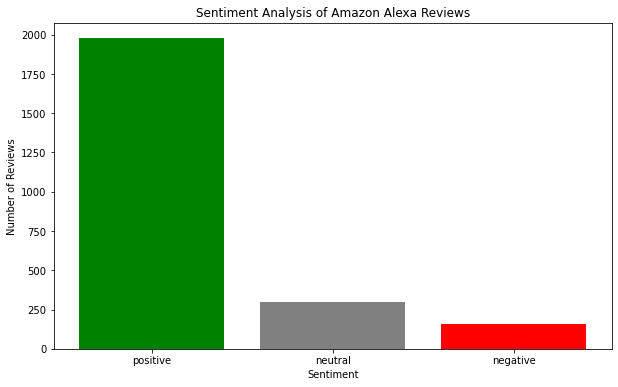

In [48]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Amazon Alexa Reviews')
plt.show()

## Findings

* <b>Positive:</b> A significant portion of reviews are positive, indicating a high level of customer satisfaction.
* <b>Neutral Sentiment:</b> There is a smaller proportion of neutral reviews, where customers may have mixed or indifferent feelings about the product.
* <b>Negative:</b> There is a smaller proportion of neutral reviews, where customers may have mixed or indifferent feelings about the product.

<p>The dominant positive sentiment suggests that most customers are satisfied with their Amazon Alexa devices. However, neutral and negative reviews can provide valuable information for possible improvements. Further analysis could identify specific areas where users encounter problems or have unmet expectations.</p>

### Conclusion

<p>Unfortunately, I was unable to hyper-tune the neural network as initially planned. Instead, I relied on the code provided by the lecturer David McQuaid to implement and evaluate the model. Additionally, I used <b>ChatGPT</b> as a brainstorming tool to generate ideas and better understand the underlying concepts and methodologies. This approach helped me understand the fundamentals of machine learning model evaluation and the importance of hyperparameter tuning, although I could not directly apply it to the neural network in this case.</p>

## Reference:

Imran Khan, M. (2024). Comparing Performances of Encoding Schemes on Regression with Cross-validation. [online] www.linkedin.com. Available at: https://www.linkedin.com/pulse/comparing-performances-encoding-schemes-regression-imran-khan-jb3xc#:~:text=One%2Dhot%20encoding [Accessed 28 May 2024].

Simplilearn (2023). Normalization vs Standardization - What’s The Difference? | Simplilearn. [online] Simplilearn.com. Available at: https://www.simplilearn.com/normalization-vs-standardization-article [Accessed 31 May 2024].

Shah, P. (2020). My Absolute Go-To for Sentiment Analysis — TextBlob. [online] Medium. Available at: https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524 [Accessed 30 May 2024].

Soulpage IT Solutions. (n.d.). One-Hot Encoding. [online] Available at: https://soulpageit.com/ai-glossary/one-hot-encoding-explained/#:~:text=One%2Dhot%20encoding%20increases%20the [Accessed 4 Jun. 2024].

Yadav, P. (2023). Text Data Preprocessing Made Easy: Steps to Clean Text Data Using Python 🧼🧹. [online] Medium. Available at: https://medium.com/@pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3 [Accessed 30 May 2024].

w3schools (n.d.). Data Science Statistics Correlation Matrix. [online] www.w3schools.com. Available at: https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp [Accessed 30 May 2024].